# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [552]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [553]:
import pandas as pd
import numpy
import pylab
import seaborn
import matplotlib.pyplot as plt

In [554]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [555]:
data = pd.read_csv("/Users/olesyamartinyuk/Downloads/students_data.csv")
data.shape

(1044, 36)

In [556]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [557]:
features = pd.read_csv('/Users/olesyamartinyuk/Downloads/students_data_features.csv', delimiter=';', encoding='windows-1251')
features

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

**1)** Для каждого признака определите, к какому типу он относится.

In [558]:
numeric = ["ID", "age", "failures", "absences", "G1", "G2", "G3"]

categorial = ["Subject", "school", "sex", "address", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup",
              "paid", "activities", "nursery", "higher", "internet", "romantic", "cheating"]

sorted_categorial = ["famsize", "Medu", "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc",
                     "Walc", "health"]

**3)** При необходимости, приведите признак к определенному вами типу.

Заменяю значения в famsize и все числа, записанные в виде строк. 

In [559]:
data.loc[:, "famsize"].replace("LE3", 3, inplace=True)
data.loc[:, "famsize"].replace("GT3", 4, inplace=True)

**2)** Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.

In [560]:
print("Категориальные признаки\n")
for key, value in data.loc[:, categorial].items():
    print(key, "unique values:", value.unique())

print("\nУпорядоченные категориальные признаки\n")
for key, value in data.loc[:, sorted_categorial].items():
    print(key, "unique values:", value.unique())

Категориальные признаки

Subject unique values: ['Por' 'Math']
school unique values: ['GP' 'MS']
sex unique values: ['F' 'M' 'm']
address unique values: ['U' 'R']
Pstatus unique values: ['A' 'T' 't']
Mjob unique values: ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob unique values: ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason unique values: ['course' 'home' 'reputation' 'other']
guardian unique values: ['father' 'mother' 'other' 'futher']
schoolsup unique values: ['no' 'yes']
famsup unique values: ['no' 'yes']
paid unique values: ['no' 'yes']
activities unique values: ['no' 'yes']
nursery unique values: ['yes' 'no']
higher unique values: ['yes' 'no']
internet unique values: ['yes' 'no']
romantic unique values: ['no' nan 'yes']
cheating unique values: [nan 'yes' 'no']

Упорядоченные категориальные признаки

famsize unique values: [4 3]
Medu unique values: ['3' '1' '2' '4' '0' 'o']
Fedu unique values: ['4' '2' '3' '1' 'o' '0']
traveltime unique valu

Исправляю опечатки

In [561]:
data.loc[:, "sex"].replace("m", "M", inplace=True)
data.loc[:, "Pstatus"].replace("t", "T", inplace=True)
data.replace("at-home", "at_home", inplace=True)
data.loc[:, "guardian"].replace("futher", "father", inplace=True)
data.replace("no", False, inplace=True)
data.replace("yes", True, inplace=True)
data.replace("o", "0", inplace=True)

Снова печатаю уникальные значения, чтобы удостовериться, что все ок

In [562]:
print("Категориальные признаки\n")
for key, value in data.loc[:, categorial].items():
    print(key, "уникальные значения:", value.unique())

print("\nУпорядоченные категориальные признаки\n")
for key, value in data.loc[:, sorted_categorial].items():
    print(key, "уникальные значения:", value.unique())

Категориальные признаки

Subject уникальные значения: ['Por' 'Math']
school уникальные значения: ['GP' 'MS']
sex уникальные значения: ['F' 'M']
address уникальные значения: ['U' 'R']
Pstatus уникальные значения: ['A' 'T']
Mjob уникальные значения: ['services' 'other' 'health' 'at_home' 'teacher']
Fjob уникальные значения: ['other' 'services' 'health' 'at_home' 'teacher']
reason уникальные значения: ['course' 'home' 'reputation' 'other']
guardian уникальные значения: ['father' 'mother' 'other']
schoolsup уникальные значения: [False  True]
famsup уникальные значения: [False  True]
paid уникальные значения: [False  True]
activities уникальные значения: [False  True]
nursery уникальные значения: [ True False]
higher уникальные значения: [ True False]
internet уникальные значения: [ True False]
romantic уникальные значения: [False nan True]
cheating уникальные значения: [nan True False]

Упорядоченные категориальные признаки

famsize уникальные значения: [4 3]
Medu уникальные значения: ['3'

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [563]:
feature_na = []
for item in data.items():
    miss_count = list(item[1].isna().values).count(True)
    if miss_count:
        feature_na.append(item[0])
        print(f"{item[0]} количество пропущенных значений: {miss_count}")        

romantic количество пропущенных значений: 10
famrel количество пропущенных значений: 10
Dalc количество пропущенных значений: 10
Walc количество пропущенных значений: 10
cheating количество пропущенных значений: 700


Количество пропущенных значений в cheating слишком большое, чтобы его можно было заменить средним значением без значительной потери точности при исследованиях. Думаю, этот признак можно убрать из data. Остальные пропущенные значения заменить средним значением.

In [564]:
feature_na.remove("cheating")
data.drop(columns=["cheating"], inplace=True)

In [565]:
for feature in feature_na:
    md = data.loc[:, feature].dropna().median()
    if feature == "romantic": md = bool(md)
    data.loc[:, feature].fillna(md, inplace=True)
    print(f"{feature} среднее значение вместо Na = {md}")

romantic среднее значение вместо Na = False
famrel среднее значение вместо Na = 4.0
Dalc среднее значение вместо Na = 1.0
Walc среднее значение вместо Na = 2.0


### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

**1)** Посчитайте описательные статистики для числовых и для категориальных признаков.

In [566]:
data.describe(include="all")

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044,1044,1044,1044.000000,1044,1044.000000,1044,1044,1044,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044,1044,1044,1044,1044,1044,1044,1044,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,NaN,2,2,2,NaN,2,NaN,2,5,5,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Por,GP,F,NaN,U,NaN,T,4,2,other,other,course,mother,NaN,NaN,NaN,False,True,False,False,True,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,649,772,591,NaN,759,NaN,923,306,324,399,584,430,728,NaN,NaN,NaN,925,640,824,528,835,955,827,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,547057.194444,NaN,NaN,NaN,16.726054,NaN,3.706897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.522989,1.970307,0.264368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.936782,3.201149,3.156130,1.492337,2.288314,3.543103,4.434866,11.213602,11.246169,11.341954
std,263827.336666,NaN,NaN,NaN,1.239975,NaN,0.455404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.731727,0.834353,0.656142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.928833,1.031507,1.152575,0.911700,1.282008,1.424703,6.210017,2.983394,3.285071,3.864796
min,100097.000000,NaN,NaN,NaN,15.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,324017.500000,NaN,NaN,NaN,16.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,554339.500000,NaN,NaN,NaN,17.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,774486.000000,NaN,NaN,NaN,18.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


**2)** Сколько студентов посещают каждую из школ?

In [567]:
print(f"{len(data.loc[data['school'] == 'GP'])} ходят в Gabriel Pereira\n{len(data.loc[data['school'] == 'MS'])} ходят в Mousinho da Silveira")

772 ходят в Gabriel Pereira
272 ходят в Mousinho da Silveira


**3)** Сколько студентов посещают математику, сколько - португальский?

In [568]:
print(f"{len(data.loc[data['Subject'] == 'Math'])} ходят на математику\n{len(data.loc[data['Subject'] == 'Por'])} ходят на португальский")

395 ходят на математику
649 ходят на португальский


**4)** Какой предмет заваливают чаще?

In [569]:
por_percent = len(data.loc[(data['G3'] < 8) & (data['Subject'] == 'Por')]) / len(data.loc[data['Subject'] == 'Por'])
math_percent = len(data.loc[(data['G3'] < 8) & (data['Subject'] == 'Math')]) / len(data.loc[data['Subject'] == 'Math'])
if por_percent > math_percent:
    print(f"Португальский заваливают чаще: {por_percent} учеников не справляются на экзамене")
else: 
    print(f"Математику заваливают чаще: {math_percent} учеников не справляются на экзамене")

Математику заваливают чаще: 0.17721518987341772 учеников не справляются на экзамене


**5)** Сколько в среднем времени в неделю уходит на учебу по каждому предмету?

In [570]:
por_time = data.loc[data['Subject'] == 'Por', 'studytime'].median()
math_time = data.loc[data['Subject'] == 'Math', 'studytime'].median()
if float(por_time) <= 1.0:
    print('Среднее время занятия португальским: меньше 2 часов в неделю')
elif 1.0 < float(por_time) <= 2.0:
    print('Среднее время занятия португальским: от 2 до 5 часов в неделю')
elif 2.0 < float(por_time) <= 3.0:
    print('Среднее время занятия португальским: от 5 до 10 часов в неделю')
else:
    print('Среднее время занятия португальским: больше 10 часов в неделю')
    
if float(math_time) <= 1.0:
    print('Среднее время занятия математикой: меньше 2 часов в неделю')
elif 1.0 < float(math_time) <= 2.0:
    print('Среднее время занятия математикой: от 2 до 5 часов в неделю')
elif 2.0 < float(math_time) <= 3.0:
    print('Среднее время занятия математикой: от 5 до 10 часов в неделю')
else:
    print('Среднее время занятия математикой: больше 10 часов в неделю')



Среднее время занятия португальским: от 2 до 5 часов в неделю
Среднее время занятия математикой: от 2 до 5 часов в неделю


**6)** На что чаще обращают внимание при выборе школы?

In [571]:
print(f"Главная причина при выборе школы это {data['reason'].value_counts().idxmax()}.")

Главная причина при выборе школы это course.


### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

**1)** Оцените Оцените распределение оценок (отдельно для G1, G2 и G3). 

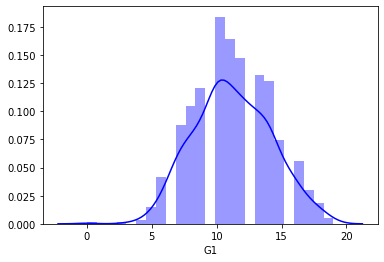

In [572]:
seaborn.distplot(data['G1'], color="b")

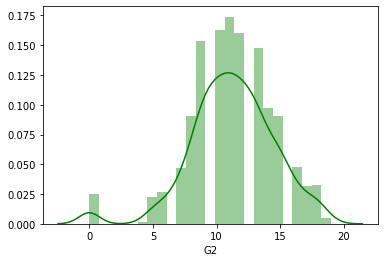

In [573]:
seaborn.distplot(data['G2'], color="g")

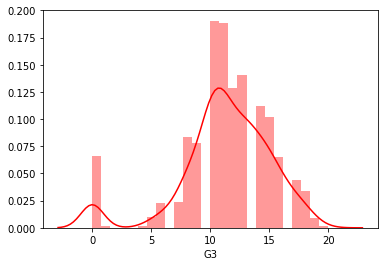

In [574]:
seaborn.distplot(data['G3'], color="r")

**Вывод:** 

Средняя плотность распределения оценок сохраняется в обоиз полугодиях и в итоговых оценках. 

В итоговых оценках нулевых оценок становится почти в три раза больше, чем во втором полугодии. Количество хороших оценок в итоге уменьшается. Все как в жизни.

**Плотность оценок по португальскому языку**

In [575]:
por_marks = data.loc[data['Subject']=='Por', ['G1', 'G2', 'G3']]

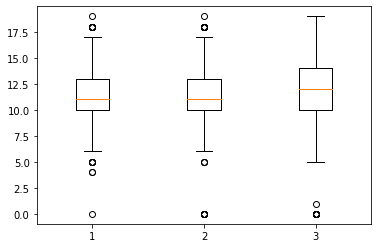

In [576]:
plt.boxplot([por_marks['G1'], por_marks['G2'], por_marks['G3']])
plt.show()

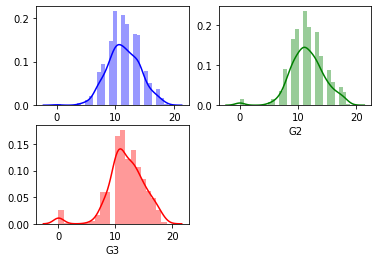

In [577]:
pylab.subplot (2, 2, 1)
seaborn.distplot(por_marks['G1'], color='b')
pylab.subplot (2, 2, 2)
seaborn.distplot(por_marks['G2'], color='g')
pylab.subplot (2, 2, 3)
seaborn.distplot(por_marks['G3'], color='r')

**Плотность оценок по математике**

In [578]:
math_marks= data.loc[data['Subject']=='Math', ['G1', 'G2', 'G3']]

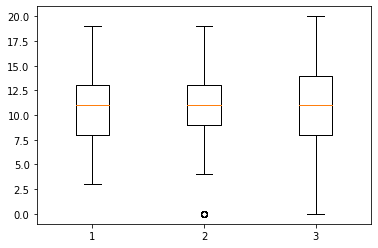

In [579]:
plt.boxplot([math_marks['G1'], math_marks['G2'], math_marks['G3']])
plt.show()

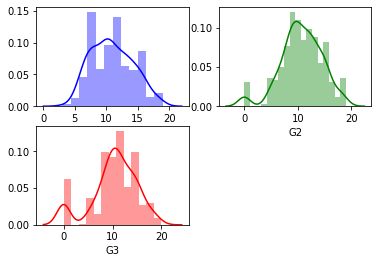

In [580]:
pylab.subplot (2, 2, 1)
seaborn.distplot(math_marks['G1'], color='b')
pylab.subplot (2, 2, 2)
seaborn.distplot(math_marks['G2'], color='g')
pylab.subplot (2, 2, 3)
seaborn.distplot(math_marks['G3'], color='r')

**Вывод:**

- Итоговые оценки и оценки за полугодия учеников по математике гораздо ниже, чем по португальскому
- Среди итоговых оценок по математике увеличивается количество низких оценок и уменьшается количество высоких оценок. По португальскому языку наоборот количество высоких оценок в итоге увеличивается. 

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

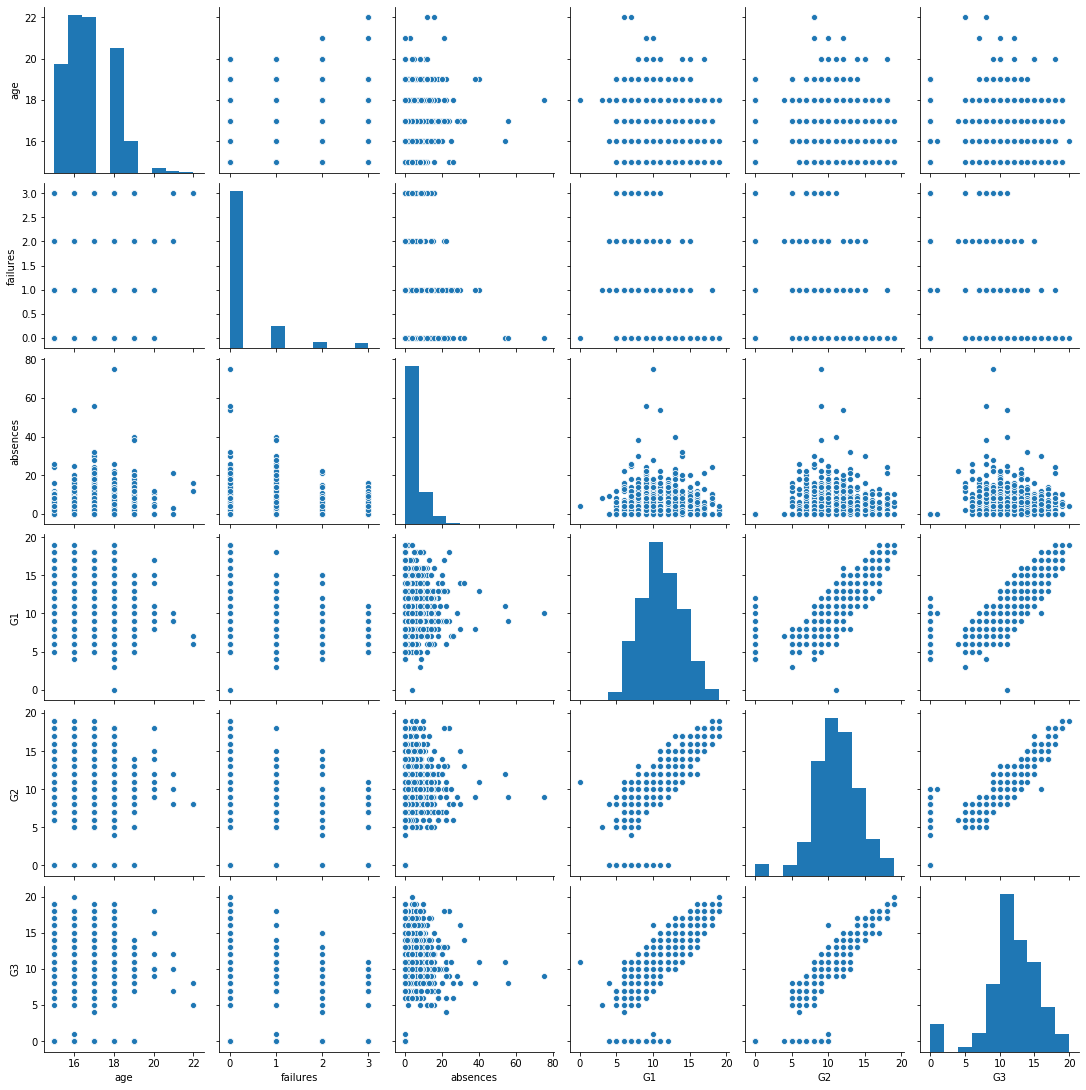

In [581]:
seaborn.pairplot(data.loc[:,numeric[1:]])

In [582]:
data[numeric].corr().round(decimals=3)

,ID,age,failures,absences,G1,G2,G3
ID,1.000,0.008,0.011,-0.041,0.045,0.023,0.015
age,0.008,1.000,0.282,0.153,-0.124,-0.119,-0.125
failures,0.011,0.282,1.000,0.100,-0.374,-0.377,-0.383
absences,-0.041,0.153,0.100,1.000,-0.092,-0.089,-0.046
G1,0.045,-0.124,-0.374,-0.092,1.000,0.859,0.809
G2,0.023,-0.119,-0.377,-0.089,0.859,1.000,0.911
G3,0.015,-0.125,-0.383,-0.046,0.809,0.911,1.000


**Вывод:**

1. Есть зависимость между оценками за первое и второе полугодия и итоговыми
2. Чем больше пропусков у студента, там хуже становятся у него оценки
3. Чем старше студент, тем меньше у него пропусков
4. Самые старшие студенты имели больше всего провалов и хуже оценки
5. 20 летние студенты справлялись с учебой лучше всего
6. Чем больше студент прогуливал, тем меньше у него провалов (справедливо)
7. Чаще всего прогуливали студенты с оценкой от 8 до 12

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

Для этого задания я решила выбрать **не все** категориальные признаки, а только **некоторые пары** из них, так как они будут нести **больше смысла** и приведут к **более интересным выводам**.

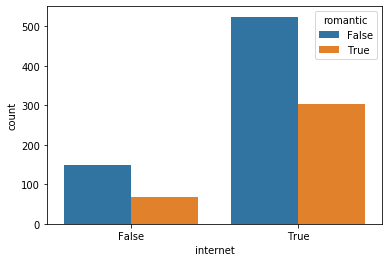

In [583]:
seaborn.countplot(x="internet", hue="romantic", data=data)

- Среди тех студентов, у которых есть доступ к интернету, больше тех, кто состоит в отношениях.

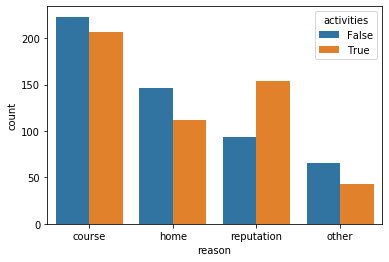

In [584]:
seaborn.countplot(x="reason", hue="activities", data=data)

- Среди студентов, которые выбирали школу по ее репутации, больше тех, кто участвует во внеучебных активностях. 
- Те, кто выбирал школу по читаемым курсам, реже всего участвуют во внеучебных активностях. 

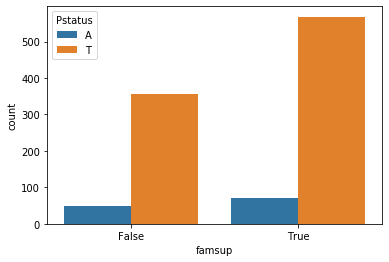

In [585]:
seaborn.countplot(x="famsup", hue="Pstatus", data=data)

- Отношения между родителями не влияетс на помощь в учебе от членов семьи.

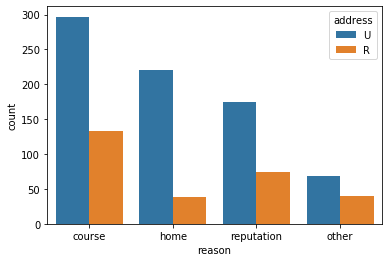

In [586]:
seaborn.countplot(x="reason", hue="address", data=data)

- Студенты, живущие в городе, и студенты, живущие за городом, чаще всего выбирали школу по читаемым курсам. 
- Студенты, живущие за городом, реже всего выбирали школу по ее местоположению относительно дома. 

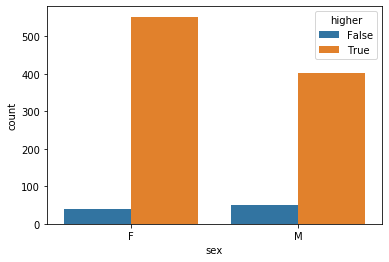

In [587]:
seaborn.countplot(x="sex", hue="higher", data=data)

- Среди тех, кто решил получать высшее образование, больше девушек. 
- Среди тех, кто решил не получать высшее образование, больше парней.

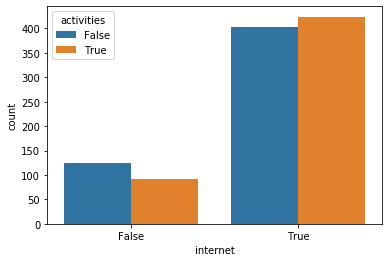

In [588]:
seaborn.countplot(x="internet", hue="activities", data=data)

- Большинство тех, кто имеют доступ к интернету, участвуют во внеучебной активности. 
- Большинство тех, кто **не имеют** доступ к интернету, **не участвуют** во внеучебной активности.

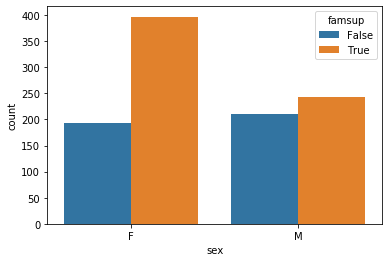

In [589]:
seaborn.countplot(x="sex", hue="famsup", data=data)

- Члены семьи активнее помогают по учебе девушкам, нежели парням. Возможно, можно сделать вывод, что девушки чаще просят помощи по учебе, в отличие от парней.

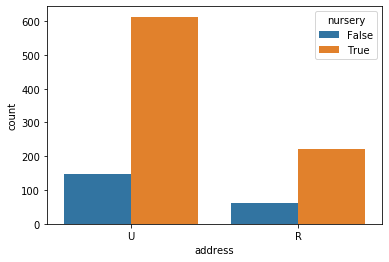

In [590]:
seaborn.countplot(x="address", hue="nursery", data=data)

- Большинство студентов, ходившие в детский сад, живут в городе.

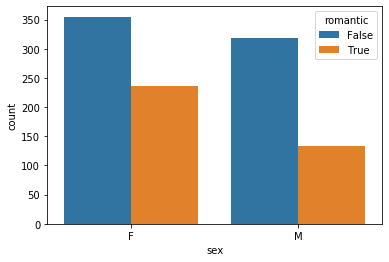

In [591]:
seaborn.countplot(x="sex", hue="romantic", data=data)

- Процент тех девушек, которые состоят в отношениях, выше процента парней, которые состоят в отношениях.

### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

**Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?**

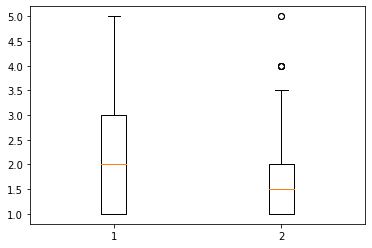

In [592]:
alc_average = []
for i in range(len(data.loc[:, ['Walc', 'Dalc']])):
    alc_average.append((alc['Walc'][i] + alc['Dalc'][i]) / 2)
data['Average_alc'] = alc_average
plt.boxplot([data.loc[data['sex']=='M', 'Average_alc'], data.loc[data['sex']=='F', 'Average_alc']])
plt.show()

In [593]:
print('По шкале употребления алкоголя от 1 до 5, где 1 - очень мало, 5 - очень много: ')
print(f"Парни выпивают {data.loc[data['sex']=='M', 'Average_alc'].median()}")
print(f"Девушки выпивают {data.loc[data['sex']=='F', 'Average_alc'].median()}")

По шкале употребления алкоголя от 1 до 5, где 1 - очень мало, 5 - очень много: 
Парни выпивают 2.0
Девушки выпивают 1.5


**Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime.**

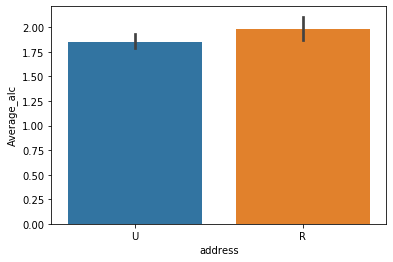

In [594]:
seaborn.barplot(data=data, y='Average_alc', x='address', estimator=np.mean)

- Больше алкоголя употребляют те студенты, которые живут за городом.

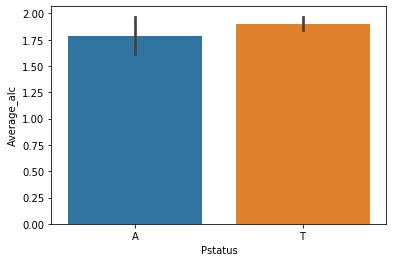

In [595]:
seaborn.barplot(data=data, y='Average_alc', x='Pstatus', estimator=np.mean)

- Больше алкоголя употребляют те студенты, у которых родители живут отдельно.

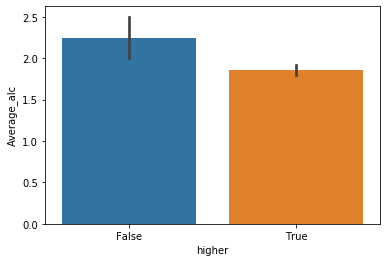

In [596]:
seaborn.barplot(data=data, y='Average_alc', x='higher', estimator=np.mean)

- Больше алкоголя употребляют те студенты, которые решили не получать высшее образование.

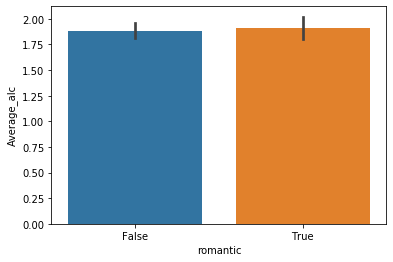

In [597]:
seaborn.barplot(data=data, y='Average_alc', x='romantic', estimator=np.mean)

- В основном, наличие или отсутствие романтических отношений не влияет на употребление алкоголя, но по графику едва заментно, что те, кто состоит в отношениях, употребляют несколько больше алкоголя (но разница едва заметна)

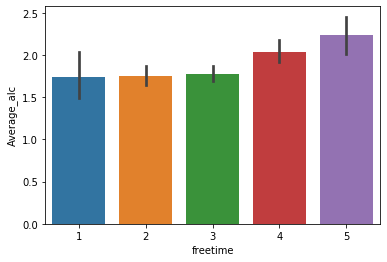

In [598]:
seaborn.barplot(data=data, y='Average_alc', x='freetime', estimator=np.mean)

- Больше алкоголя употребляют те, у кого больше свободного времени.

**Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).**

In [599]:
alc_m = data.loc[data['guardian'] == 'mother', ['Average_alc','Medu']]
alc_f = data.loc[data['guardian'] == 'father', ['Average_alc','Fedu']]

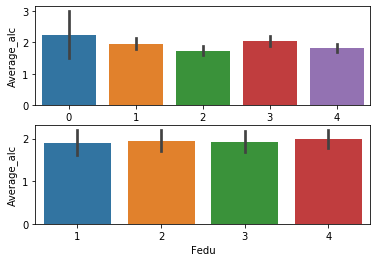

In [600]:
pylab.subplot (2, 1, 1)
seaborn.barplot(data=alc_m, y='Average_alc', x='Medu', estimator=np.mean)
pylab.subplot (2, 1, 2)
seaborn.barplot(data=alc_f, y='Average_alc', x='Fedu', estimator=np.mean)

- Среди матерей больше алкоголя употребляют те, кто без образования. Меньше всего употребляют матери, закончившие от 5 до 9 классов.
- Уровень образования отцов не влияет на количество употребляемого алкоголя :D

**Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по G3). Выполните сравнение отдельно для каждого предмета (Math и Por). Дайте содержательный комментарий.**

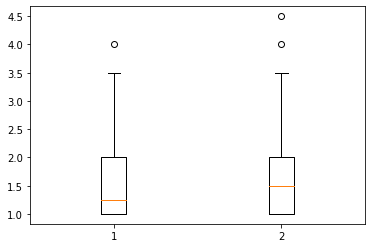

In [601]:
plt.boxplot([data.nlargest(50, 'G3')['Average_alc'], data.nsmallest(50, 'G3')['Average_alc']])
plt.show()

In [602]:
print('Среднее потребление алкоголя "отличниками": ',data.nlargest(50, 'G3')['Average_alc'].median())
print('Среднее потребление алкоголя "двоечниками": ', data.nsmallest(50, 'G3')['Average_alc'].median())

Среднее потребление алкоголя "отличниками":  1.25
Среднее потребление алкоголя "двоечниками":  1.5


- "Двоечники" употребляют алкоголь чуть больше, чем отличники

### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

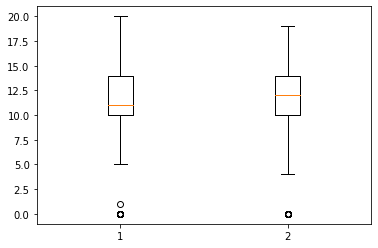

In [603]:
# - Зависимость от пола
plt.boxplot([data.loc[data['sex']=='M', 'G3'], data.loc[data['sex']=='F', 'G3']])
plt.show()

- Средняя оценка выше у девушек
- Наивысший и наинизший балл выше у парней.

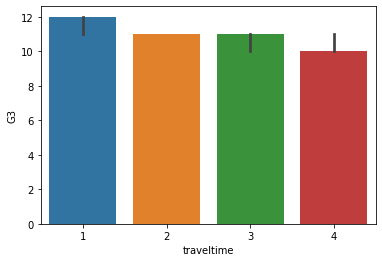

In [604]:
# - Зависимость от времени в пути от дома до школы
seaborn.barplot(data=data, y='G3', x='traveltime', estimator=np.median)

- Чем ближе студент живет к школе, тем выше его итоговая оценка.

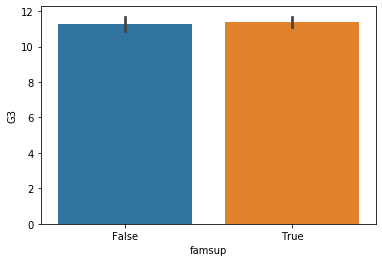

In [605]:
# - Зависимость от наличия дополнительной помощи в учебе (от членов семьи или вообще)
seaborn.barplot(data=data, y='G3', x='famsup', estimator=np.mean)

- Помощь в учебе от членов семьи не влияет на итоговую оценку студента.

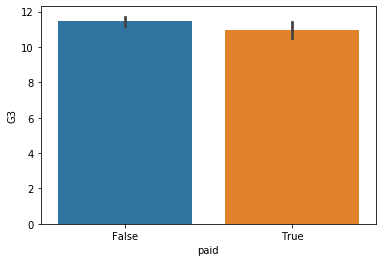

In [606]:
# - Зависимость от посещения платных дополнительных занятий
seaborn.barplot(data=data, y='G3', x='paid', estimator=np.mean)

- Студенты, не посещающие платные дополнительные занятия, получают более высокие оценки.

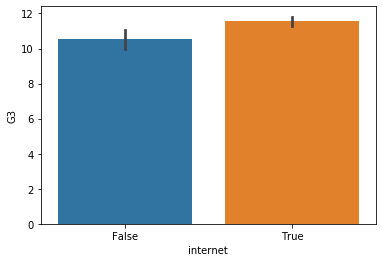

In [607]:
# - Зависимость от наличия интернета
seaborn.barplot(data=data, y='G3', x='internet', estimator=np.mean)

- Студенты, имеющие доступ в Интернет, более успешны в учебе.

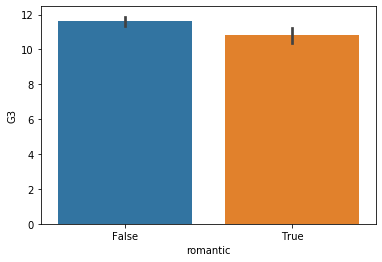

In [608]:
# - Зависимость от наличия романтических отношений
seaborn.barplot(data=data, y='G3', x='romantic', estimator=np.mean)

- Студеты не состоящие в романтических отношениях, получают более высокие оценки.

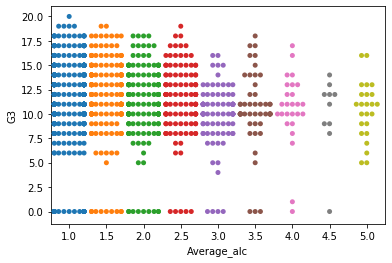

In [609]:
# - Зависимость от употребления алкоголя
seaborn.swarmplot(data=data, y='G3', x='Average_alc')

- Студенты, употребляющие меньше всего алкоголя, получают оценки выше, чем те, кто употребляет алкоголь очень часто.

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [610]:
def to_4p(gr):
    return {
         gr <  8  : 1,
    8  <= gr <= 13: 2,
    14 <= gr <= 17: 3,
    18 <= gr <= 20: 4
    }[1]

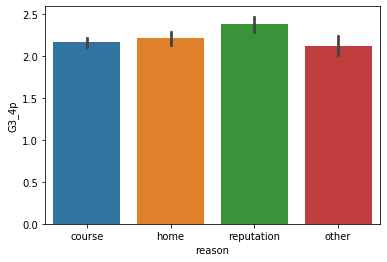

In [611]:
data['G3_4p'] =  data.loc[:, 'G3'].map(to_4p)
seaborn.barplot(data=data, y="G3_4p", x="reason")

- Итоговая оценка лучше у тех студентов, кто выбирал школу по ее репутации

### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

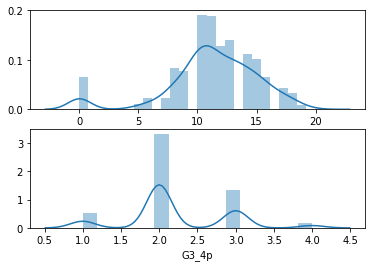

In [612]:
# Например, с помощью графика плотности
pylab.subplot (2, 1, 1)
seaborn.distplot(data["G3"])
pylab.subplot (2, 1, 2)
seaborn.distplot(data["G3_4p"])